<a href="https://colab.research.google.com/github/deepakbastola/AI_Science_Medicine/blob/main/Google%20Colab/Generative_Networks_Hahn_AI_2023_Autoencoder_and_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
!pip install wandb
import wandb as wb

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y


## MNIST
    

### Load Data

In [ ]:
# #MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set  = MNIST('./data', train=False, download=True)

#KMNIST
train_set = KMNIST('./data', train=True, download=True)
test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape

(60000, 1, 28, 28)

In [ ]:
plot(X[101,0,:,:])

In [ ]:
Y[100]

0

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)


### Classifier


In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

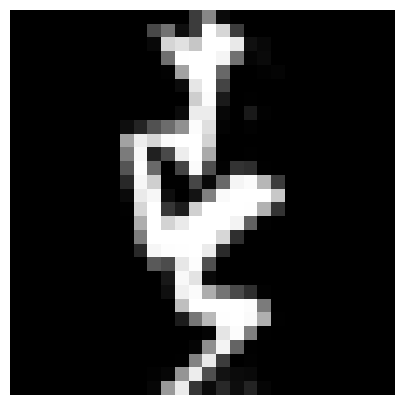

In [ ]:
plot(x[0].reshape(28,28))

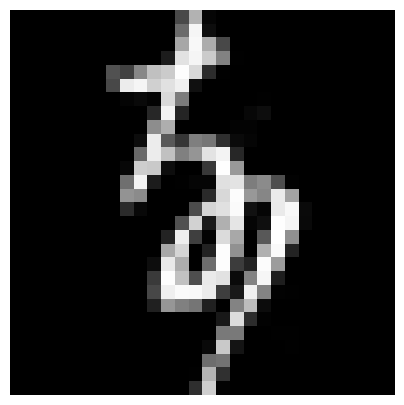

In [ ]:
plot(x[1].reshape(28,28))

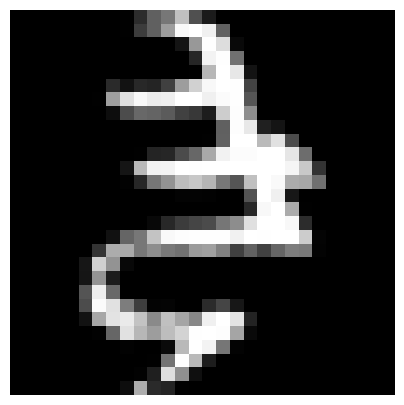

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y[:10]

tensor([2., 4., 1., 2., 6., 1., 8., 7., 4., 6.], device='cuda:0')

In [ ]:
W = GPU(np.random.randn(784,10))

In [ ]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

20.5 µs ± 228 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
x@W

tensor([[-17.4171,  -5.1048,  -2.3461,  ...,  13.2058,  -5.2600,  12.5209],
        [-15.5316,   3.9252,  -6.2792,  ...,  11.0007,   7.8040,   3.0145],
        [  2.9149, -19.7439,  -2.4081,  ...,   2.2172,   6.0639,  -6.1744],
        ...,
        [ -6.2577,  -3.1230,   3.6709,  ...,  -2.4530,   9.4315,   5.2869],
        [ -7.4122, -15.5815,   3.7660,  ...,  -3.9014,   5.6533,  10.3195],
        [ -3.6269,   1.6593,  -5.4445,  ...,   3.3864,   1.2112,   3.7497]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W 

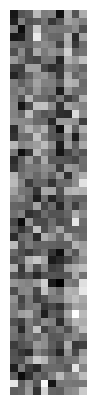

In [ ]:
plot(y2[:50])

In [ ]:
y

tensor([2., 4., 1., 2., 6., 1., 8., 7., 4., 6., 6., 3., 6., 4., 3., 2., 8., 2.,
        1., 5., 1., 5., 0., 4., 3., 9., 5., 7., 1., 2., 5., 5., 5., 8., 8., 0.,
        0., 1., 7., 6., 0., 7., 2., 1., 8., 9., 0., 9., 3., 0., 7., 9., 8., 2.,
        0., 4., 4., 8., 2., 3., 8., 6., 7., 4., 1., 7., 7., 0., 6., 6., 9., 3.,
        0., 7., 3., 6., 8., 0., 7., 7., 2., 3., 3., 5., 4., 2., 3., 7., 8., 4.,
        5., 7., 3., 2., 2., 2., 3., 2., 1., 1., 0., 0., 8., 7., 8., 0., 8., 0.,
        8., 6., 7., 8., 2., 6., 1., 0., 6., 8., 7., 8., 7., 7., 8., 6., 5., 0.,
        3., 4., 3., 9., 3., 6., 2., 9., 5., 4., 8., 0., 2., 2., 0., 9., 3., 1.,
        9., 0., 9., 3., 5., 2., 6., 7., 5., 0., 4., 7., 1., 8., 1., 6., 6., 7.,
        4., 0., 0., 6., 8., 4., 4., 2., 8., 0., 9., 8., 1., 0., 6., 0., 4., 9.,
        3., 2., 4., 7., 0., 5., 7., 8., 2., 3., 5., 7., 4., 3., 6., 8., 7., 4.,
        9., 8., 7., 0., 6., 2., 6., 4., 3., 8., 4., 1., 8., 6., 5., 5., 6., 9.,
        9., 5., 8., 6., 2., 5., 3., 3., 

In [ ]:
y.shape

torch.Size([1000])

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
one_hot(y)

In [ ]:
torch.argmax(y2,1)

tensor([3, 7, 3, 3, 7, 7, 9, 3, 7, 7, 3, 2, 4, 8, 7, 7, 3, 4, 3, 4, 7, 0, 9, 8,
        1, 3, 8, 8, 3, 4, 0, 9, 3, 9, 8, 9, 9, 8, 8, 8, 8, 3, 4, 7, 9, 3, 8, 9,
        4, 4, 9, 9, 7, 8, 8, 4, 8, 4, 5, 8, 8, 9, 9, 9, 8, 9, 9, 9, 2, 9, 3, 0,
        8, 9, 9, 9, 3, 7, 9, 7, 4, 4, 9, 8, 8, 3, 4, 9, 3, 8, 1, 8, 8, 3, 7, 3,
        4, 3, 3, 3, 9, 9, 7, 9, 4, 8, 3, 8, 5, 8, 9, 8, 8, 9, 5, 7, 4, 3, 8, 7,
        7, 4, 3, 3, 0, 2, 4, 7, 9, 9, 0, 4, 4, 7, 3, 2, 9, 7, 2, 3, 8, 3, 9, 8,
        9, 9, 8, 9, 3, 3, 3, 9, 0, 4, 4, 9, 4, 3, 7, 4, 3, 9, 9, 4, 9, 3, 7, 2,
        9, 7, 7, 9, 8, 9, 4, 7, 7, 9, 4, 9, 2, 3, 8, 7, 7, 1, 0, 9, 8, 9, 9, 9,
        2, 3, 5, 7, 9, 9, 8, 0, 9, 7, 8, 4, 4, 8, 4, 7, 9, 8, 8, 9, 9, 8, 8, 2,
        4, 4, 9, 8, 3, 7, 8, 4, 7, 3, 4, 0, 4, 3, 8, 4, 1, 7, 2, 3, 1, 4, 3, 9,
        9, 9, 7, 9, 4, 3, 7, 9, 4, 3, 9, 3, 1, 9, 8, 7, 9, 8, 4, 3, 9, 3, 4, 3,
        4, 9, 3, 3, 9, 9, 6, 9, 0, 9, 4, 8, 3, 7, 7, 8, 7, 7, 3, 8, 0, 7, 3, 9,
        9, 4, 9, 3, 4, 9, 3, 7, 9, 4, 7,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0890, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[  9.0850,  -5.3724,   6.1245,  ...,   1.9338,   6.6725,   7.3011],
        [ 14.6716,   3.0929, -21.4242,  ...,   4.2271,  11.9587,  32.1521],
        [ -4.9606,   9.6050,  -5.5340,  ..., -11.9963,  24.4383,   4.5722],
        ...,
        [  7.1590,  -9.8809, -17.1827,  ...,  17.9603,   9.4393,  12.5729],
        [  2.6450,   8.3020,  -1.5425,  ...,  12.4378,   5.6433,  21.9068],
        [  0.5676,  -8.7371,  -8.4432,  ...,  23.9717,  17.7174,   5.3518]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1)

tensor([6, 9, 8,  ..., 7, 9, 4], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0841, device='cuda:0')

In [ ]:
X@W

tensor([[  9.0850,  -5.3724,   6.1245,  ...,   1.9338,   6.6725,   7.3011],
        [ 14.6716,   3.0929, -21.4242,  ...,   4.2271,  11.9587,  32.1521],
        [ -4.9606,   9.6050,  -5.5340,  ..., -11.9963,  24.4383,   4.5722],
        ...,
        [  7.1590,  -9.8809, -17.1827,  ...,  17.9603,   9.4393,  12.5729],
        [  2.6450,   8.3020,  -1.5425,  ...,  12.4378,   5.6433,  21.9068],
        [  0.5676,  -8.7371,  -8.4432,  ...,  23.9717,  17.7174,   5.3518]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

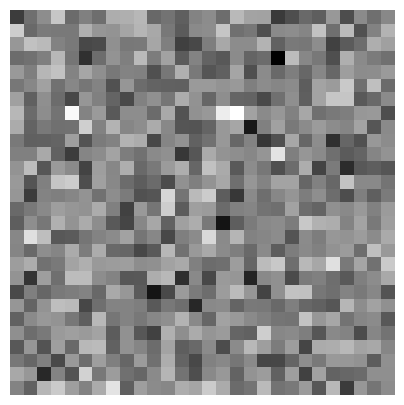

In [ ]:
plot(W[:,0].reshape(28,28))

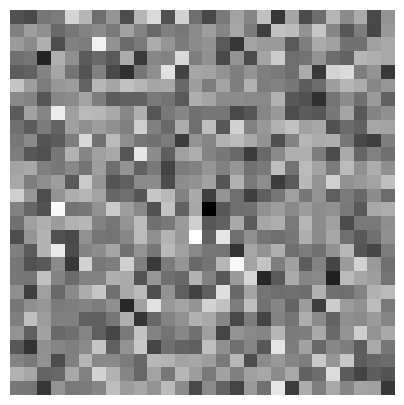

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

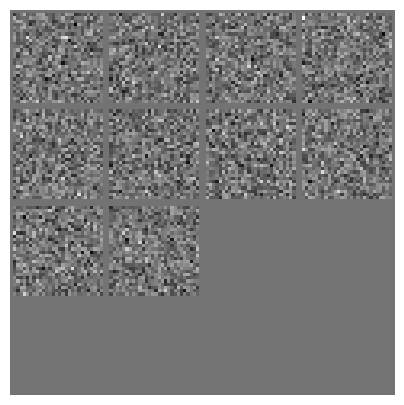

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data
    
    w[0].grad.data.zero_()

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_SGD_23");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()
    
        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)  

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *

In [ ]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):

    x_real,y = get_batch('train')
    
    x_fake = Autoencoder(x_real,w)
    
    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if i % 100 == 0: print(loss.item())

In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



Convolutional Transpose

In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 32

In [ ]:
#MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = Variable(torch.ones(batch_size, 1).cuda())
fake_labels = Variable(torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500 
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = Variable(torch.randn(steps,batch_size,latent_size).cuda())
z2 = Variable(torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in range(steps):
        
    images,y = get_batch('train')
        
    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()
       
    
    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    
    if i % 2000 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])